In [ ]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageFilter
import tensorflow_hub as hub

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r"/content/drive/MyDrive/Resistor color recognition app/BetaDataset"

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(path)

Found 1010 files belonging to 13 classes.


In [ ]:
data = data.map(lambda image,y: (tf.image.resize(image, [224, 224]),y))

In [ ]:
data = data.map(lambda x, y: (x/255.0, y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
# splitting the data

train_size = int(len(data)* .7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.2)


In [ ]:
train = data.take(train_size) 
test = data.skip(train_size).take(test_size)
val = data.skip(train_size + test_size).take(val_size)

In [ ]:
len(train)

22

In [ ]:
train_iterator = train.as_numpy_iterator()
train_iter = train_iterator.next()

In [ ]:
type(train_iter)

tuple

In [ ]:
len(train_iter)

2

In [ ]:
len(train_iter[0])

32

In [ ]:
print(train_iter[1])

[10  7  3 12  8  1  3 11 12  7  9  3  1  1  6  8  0  5  9  4  6  9  8  6
  1  4  9 11  1  5  9  1]


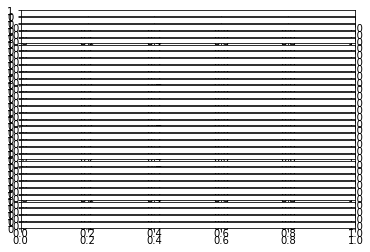

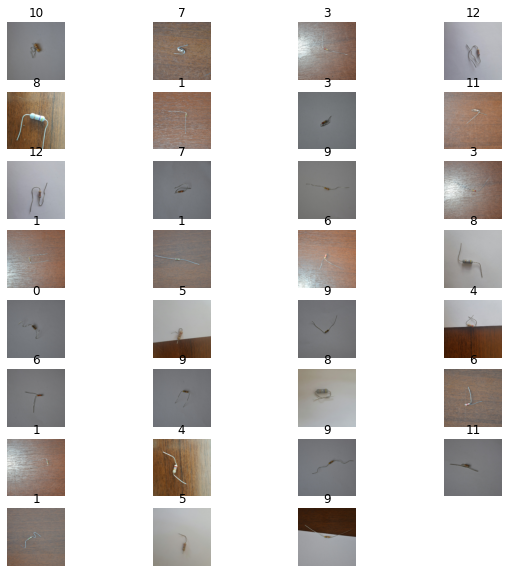

In [ ]:
axs = plt.subplots(32)
rows = 8
columns = 4
#plt.figure(figsize=(10,10))
#fig = plt.figure(figsize=(10, 10))

for x in range(1,32):
  #plt.figure(figsize=(5,5)) 
  fig.add_subplot(rows,columns,x)
  plt.imshow(train_iter[0][x-1])
  plt.title(train_iter[1][x-1])
  plt.axis('off')

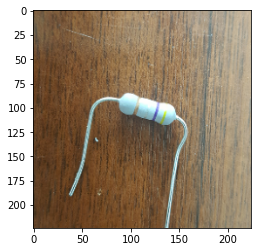

In [ ]:
plt.imshow(train_iter[0][4])

In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))

In [ ]:
mobile_net_layers.trainable = False 

In [ ]:
neural_net = tf.keras.Sequential([
  mobile_net_layers,
  tf.keras.layers.Dropout(0.20),
  tf.keras.layers.Dense(13,activation='softmax',kernel_regularizer=tf.keras.regularizers.L1(0.0001),
    activity_regularizer=tf.keras.regularizers.L2(0.0001))
])

In [ ]:
neural_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 13)                16653     
                                                                 
Total params: 2,274,637
Trainable params: 16,653
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
neural_net.compile(loss='SparseCategoricalCrossentropy',optimizer="adam",metrics=['acc'])

In [ ]:
hist = neural_net.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
22/22 [==============================] - 12s 468ms/step - loss: 2.4896 - acc: 0.2131 - val_loss: 1.9767 - val_acc: 0.4271
Epoch 2/20
22/22 [==============================] - 12s 524ms/step - loss: 1.6816 - acc: 0.4773 - val_loss: 1.4797 - val_acc: 0.5521
Epoch 3/20
22/22 [==============================] - 11s 439ms/step - loss: 1.3609 - acc: 0.5994 - val_loss: 1.2889 - val_acc: 0.6354
Epoch 4/20
22/22 [==============================] - 12s 481ms/step - loss: 1.0940 - acc: 0.7031 - val_loss: 1.1428 - val_acc: 0.6771
Epoch 5/20
22/22 [==============================] - 12s 485ms/step - loss: 0.9486 - acc: 0.7528 - val_loss: 0.9173 - val_acc: 0.7812
Epoch 6/20
22/22 [==============================] - 11s 441ms/step - loss: 0.8646 - acc: 0.7741 - val_loss: 0.8720 - val_acc: 0.8021
Epoch 7/20
22/22 [==============================] - 11s 437ms/step - loss: 0.7510 - acc: 0.8281 - val_loss: 0.8961 - val_acc: 0.7917
Epoch 8/20
22/22 [==============================] - 12s 518ms/step - 

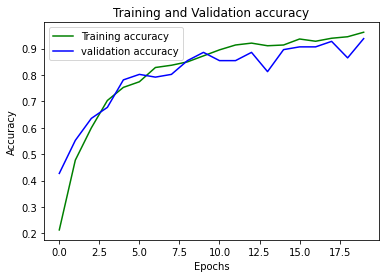

In [ ]:
loss_train = hist.history['acc']
loss_val = hist.history['val_acc']
epochs = range(20)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

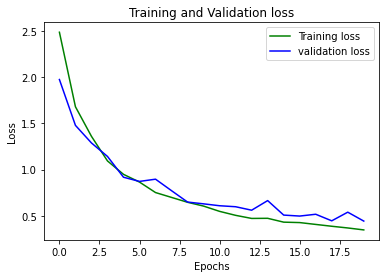

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(20)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [ ]:
test_score= neural_net.evaluate(test)

6/6 [==============================] - 6s 88ms/step - loss: 0.4712 - acc: 0.9375


In [ ]:
import pickle
#pickle.dump(hist, open('model.pkl', 'wb'))

In [ ]:
neural_net = pickle.load(open('/content/model.pkl', 'rb'))

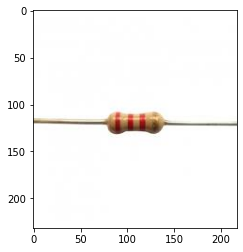

In [ ]:
import cv2
img = cv2.imread('/content/2.2K.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

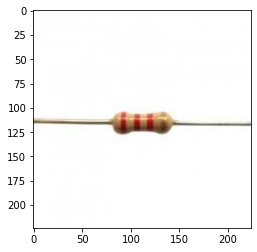

In [ ]:
resize = tf.image.resize(img,(224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = neural_net.predict(np.expand_dims(resize/255,0))

AttributeError: ignored

In [ ]:
yhat

array([[0.06451001, 0.0821802 , 0.09319405, 0.0058954 , 0.07456754,
        0.02446526, 0.02286252, 0.02205642, 0.3016081 , 0.10365424,
        0.05280205, 0.07008791, 0.08211628]], dtype=float32)

In [ ]:
np.argmax(yhat, axis=1)[:25]

array([8])